<a href="https://colab.research.google.com/github/ronupanchal/ML_Algorithm_code/blob/main/SVM_demo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Support Vector Machine (SVM) with 'linear' kernel

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
X_train

array([[4.40e+01, 3.90e+04],
       [3.20e+01, 1.20e+05],
       [3.80e+01, 5.00e+04],
       [3.20e+01, 1.35e+05],
       [5.20e+01, 2.10e+04],
       [5.30e+01, 1.04e+05],
       [3.90e+01, 4.20e+04],
       [3.80e+01, 6.10e+04],
       [3.60e+01, 5.00e+04],
       [3.60e+01, 6.30e+04],
       [3.50e+01, 2.50e+04],
       [3.50e+01, 5.00e+04],
       [4.20e+01, 7.30e+04],
       [4.70e+01, 4.90e+04],
       [5.90e+01, 2.90e+04],
       [4.90e+01, 6.50e+04],
       [4.50e+01, 1.31e+05],
       [3.10e+01, 8.90e+04],
       [4.60e+01, 8.20e+04],
       [4.70e+01, 5.10e+04],
       [2.60e+01, 1.50e+04],
       [6.00e+01, 1.02e+05],
       [3.80e+01, 1.12e+05],
       [4.00e+01, 1.07e+05],
       [4.20e+01, 5.30e+04],
       [3.50e+01, 5.90e+04],
       [4.80e+01, 4.10e+04],
       [4.80e+01, 1.34e+05],
       [3.80e+01, 1.13e+05],
       [2.90e+01, 1.48e+05],
       [2.60e+01, 1.50e+04],
       [6.00e+01, 4.20e+04],
       [2.40e+01, 1.90e+04],
       [4.20e+01, 1.49e+05],
       [4.60e+

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Fitting the classifier classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state= 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [9]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [10]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  2],
       [ 8, 24]])

In [13]:
(66+24)/(66+2+8+24)

0.9

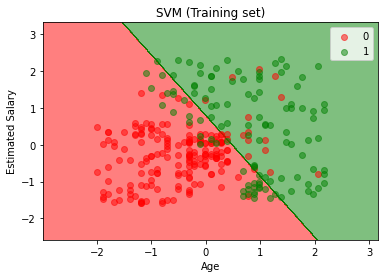

In [11]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.5,
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


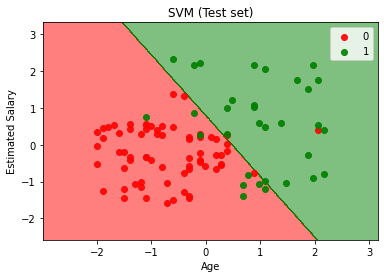

In [12]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.9,
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()